In [1]:
import sys
import importlib
import os

parent_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_path not in sys.path:
    sys.path.insert(0, parent_path)

import utils
importlib.reload(utils)
from utils import *

import files
importlib.reload(files)
from files import *

In [63]:
conso

,0.0000,0.0000.1,0.0000.2,0.0000.3,0.0000.4,0.0000.5,0.0000.6,0.0000.7,0.0000.8,0.0000.9,...,0.0000.16,0.0000.17,0.0000.18,0.0000.19,0.0000.20,0.0000.21,0.0000.22,0.0000.23,heat_on,clusters
0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.598,0.926,2.525,1.891,0.560,...,0.318,0.001,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
3,0.0,0.0,0.0,0.0,0.0,0.189,0.694,2.227,1.544,0.605,...,0.808,0.264,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
4,0.0,0.0,0.0,0.0,0.0,0.152,1.793,1.702,1.333,1.548,...,0.328,0.070,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0
723,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0
724,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0
725,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0


In [29]:
conso = pd.read_csv("../data/GA/heating_consumption.csv")

In [34]:
conso2=add_binary_column(conso, column_name="heat_on")


In [35]:
conso3 = conso2[conso2["heat_on"] == 1].drop(columns=["heat_on"])
model = apply_kmeans(n_clusters=3, data=conso3)
conso2.loc[conso2["heat_on"] == 1, "clusters"] = model.labels_
conso2.loc[conso2["heat_on"] == 0, "clusters"] = 3

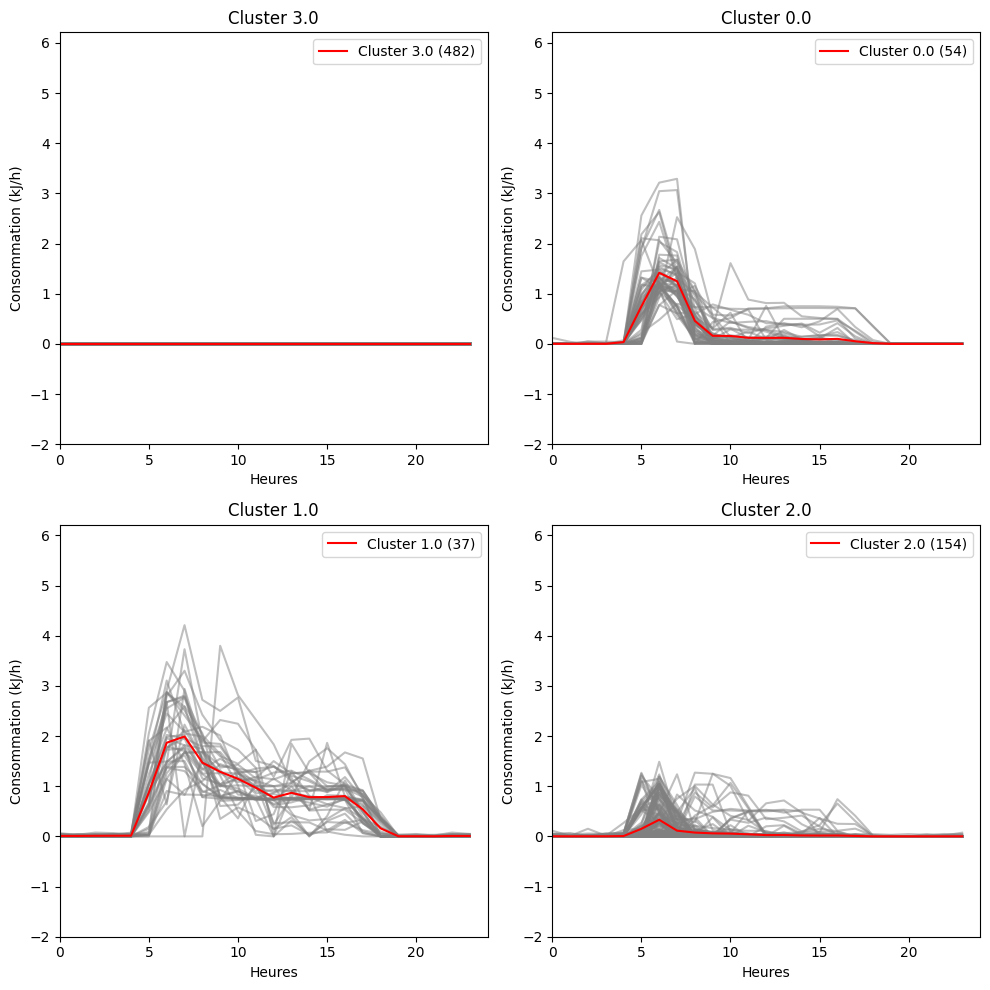

In [37]:
plot_clusters(conso2.drop(columns=["heat_on"]))


In [50]:
Text = pd.read_csv("../data/GA/outdoor_temperature.csv")

In [51]:
Text.columns = Text.columns.astype(str)
conso.columns = conso.columns.astype(str)

Text=pd.concat([Text,conso[["heat_on","clusters"]]],axis=1).reset_index(drop=True)
Text=pd.concat([Text,conso2.iloc[:,:-2]],axis=1).reset_index(drop=True)


In [64]:
Text

,5.2000,4.2000,4.4000,3.3000,1.7000,2.8000,1.9000,1.9000.1,2.0000,2.3000,...,0.0000.14,0.0000.15,0.0000.16,0.0000.17,0.0000.18,0.0000.19,0.0000.20,0.0000.21,0.0000.22,0.0000.23
0,0.9,1.4,1.6,0.8,-0.4,-1.1,-1.2,-0.7,-0.7,-0.1,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.8,0.9,0.9,1.1,1.3,1.3,0.1,-0.6,1.9,3.6,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.2,0.1,0.6,0.3,-0.4,-0.4,0.1,0.8,2.4,...,0.081,0.109,0.318,0.001,0.0,0.0,0.0,0.0,0.0,0.0
3,1.9,1.7,1.3,1.5,1.5,1.3,1.0,0.9,1.1,1.6,...,0.620,0.823,0.808,0.264,0.0,0.0,0.0,0.0,0.0,0.0
4,1.4,1.5,1.5,1.5,1.4,1.5,1.5,1.4,1.7,2.2,...,0.278,0.120,0.328,0.070,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,7.1,7.2,7.6,10.5,11.7,8.5,7.7,8.0,11.0,12.6,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
723,8.1,7.8,6.9,7.0,5.8,7.8,6.5,7.5,9.1,11.9,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
724,10.9,11.0,10.7,10.9,10.9,10.6,10.5,10.7,11.0,11.2,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
725,6.5,6.9,6.3,5.8,4.9,4.8,4.0,5.1,7.3,9.5,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df = Text.copy()
scaler_temp = StandardScaler() 
scaler_cons = StandardScaler()

df_scaled = np.hstack([
    scaler_temp.fit_transform(df.iloc[:, :24]),   
    df.iloc[:, 24:26].values,     
    scaler_cons.fit_transform(df.iloc[:, 26:]),  
])

df_final = pd.DataFrame(df_scaled, columns=df.columns)
data = df_final.values  
time_steps = 1  

X, y = [], []
for i in range(1,len(data) ):
    X.append(np.hstack([data[i-1, :], data[i, :24], data[i, 24:26]])) 
    y.append(data[i, 26:]) 
X, y = np.array(X), np.array(y)

print("Shape of X:", X.shape) 
print("Shape of y:", y.shape) 

X = X.reshape(X.shape[0], 1, X.shape[1]) 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=42)


Shape of X: (726, 76)
Shape of y: (726, 24)


Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 1.1982 - mae: 0.3940 - mse: 1.1982 - val_loss: 0.4796 - val_mae: 0.2772 - val_mse: 0.4796
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8161 - mae: 0.3325 - mse: 0.8161 - val_loss: 0.4344 - val_mae: 0.2553 - val_mse: 0.4344
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6695 - mae: 0.3151 - mse: 0.6695 - val_loss: 0.4099 - val_mae: 0.2428 - val_mse: 0.4099
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6432 - mae: 0.3027 - mse: 0.6432 - val_loss: 0.3972 - val_mae: 0.2342 - val_mse: 0.3972
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6035 - mae: 0.2989 - mse: 0.6035 - val_loss: 0.3896 - val_mae: 0.2368 - val_mse: 0.3896
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6019 - mae: 0.2910 - mse: 0.6019 - val_loss: 0.3841 - val_mae: 0.2385 - val_mse: 0.3841
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7403 - mae: 0.3132 - mse: 0.7403 - val_loss: 0.3736 - va

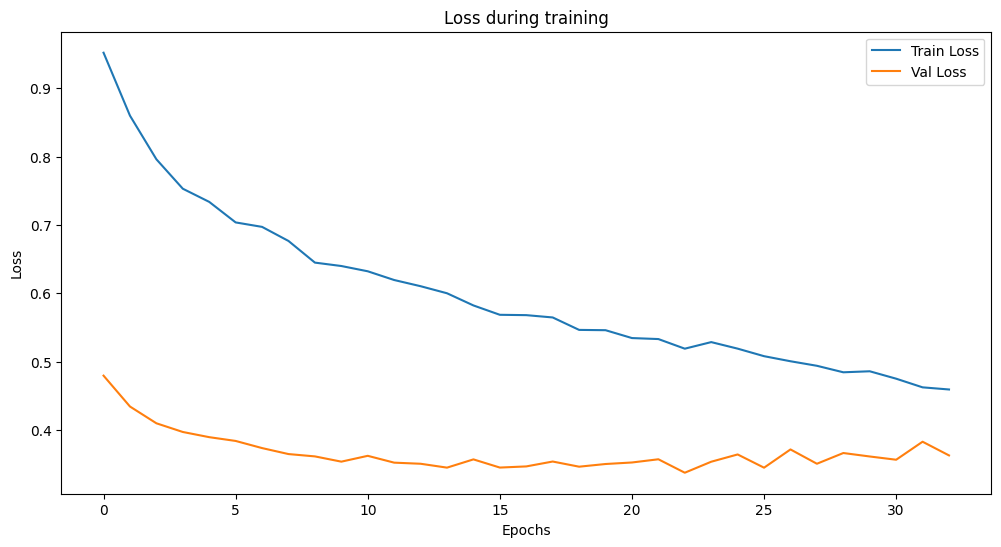

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3260 - mae: 0.1918 - mse: 0.3260
Validation Loss : 0.33757561445236206
Validation MAE: 0.20308025181293488
Validation MSE: 0.33757561445236206
Validation RMSE: 0.5810125768452539
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step 
Test MAE: 0.0517281000508642
Test MSE: 0.03585212293493573
Test RMSE: 0.18934656832099106
Test R²: 0.48626677840928506
Test CVRMSE: 3.3309421208367773


In [82]:
model = Sequential()
model.add(LSTM(68, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))  
model.add(Dropout(0.2))
model.add(Dense(24, activation='linear'))  
history, loss, mae, mse,rmse,  mae_test, mse_test, rmse_test, r2, cvrmse,predictions = train_and_evaluate(model, X_train, y_train, X_test, y_test,scaler_temp,scaler_cons)

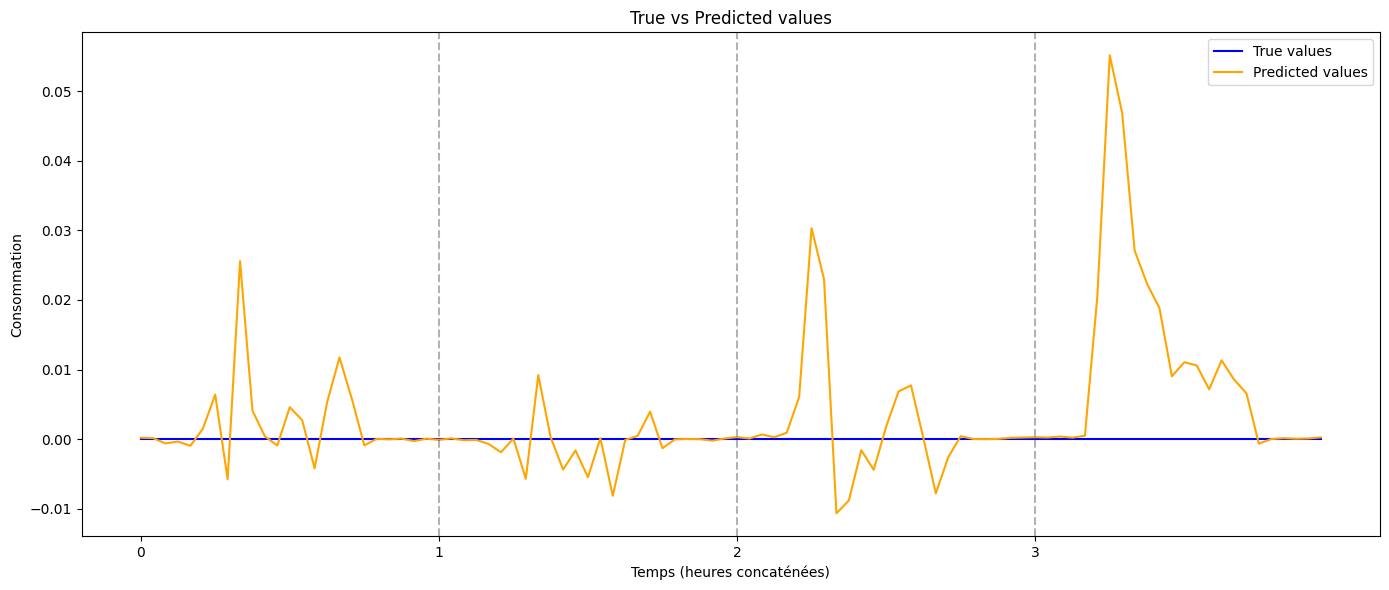

In [80]:
indices = [5, 25, 50, 10]
plot_true_vs_predicted(indices, y_test, predictions, scaler_cons)

array([[-1.75449188, -1.64312495, -1.57665825, ..., -0.0964195 ,
        -0.13332614, -0.13596887],
       [-1.76976404, -1.72056854, -1.68654669, ..., -0.0964195 ,
        -0.13332614, -0.13596887],
       [-1.81558053, -1.82898956, -1.81213347, ..., -0.0964195 ,
        -0.13332614, -0.13596887],
       ...,
       [-0.2272758 , -0.15620808, -0.14810862, ..., -0.0964195 ,
        -0.13332614, -0.13596887],
       [-0.89925088, -0.7912455 , -0.83883591, ..., -0.0964195 ,
        -0.13332614, -0.13596887],
       [-0.47163037, -0.48147115, -0.46207557, ..., -0.0964195 ,
        -0.13332614, -0.13596887]])